In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import json

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = [5.0, 3.0]
plt.rcParams['figure.dpi'] = 150
%matplotlib notebook

In [2]:
true_data = pd.read_csv("csv_data/usa.txt",sep=' ', skipinitialspace=True, \
                        skiprows=1, header=None, names=['confirmed', 'recovered', 'deaths'])
true_data

,confirmed,recovered,deaths
0,1,0,0
1,1,0,0
2,2,0,0
3,2,0,0
4,5,0,0
...,...,...,...
697,50892021,0,806749
698,51133980,0,808201
699,51312430,0,810045
700,51553481,0,812069


In [3]:
smoothed_data = pd.read_csv("../C++/build/release/results/usa_popsmooth.txt", skipinitialspace=True, \
                            header=None, names=['confirmed_true', 'deaths_true', 'confirmed_smooth', 'deaths_smooth', 'vaccine_smooth'])
diff_data = smoothed_data.diff();
diff_data.loc[0] = 0
smoothed_data

,confirmed_true,deaths_true,confirmed_smooth,deaths_smooth,vaccine_smooth
0,1,0,1,0,0
1,1,0,1,0,0
2,2,0,2,0,0
3,2,0,3,0,0
4,5,0,4,0,0
...,...,...,...,...,...
697,50892021,806749,50994597,807722,202832447
698,51133980,808201,51177280,809306,202945694
699,51312430,810045,51341346,810497,203057148
700,51553481,812069,51560244,812512,203155786


<IPython.core.display.Javascript object>


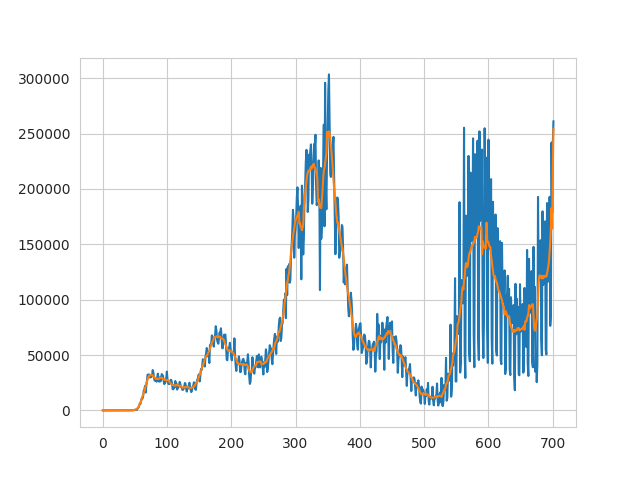

In [4]:
plt.figure()
plt.plot(diff_data['confirmed_true'])
plt.plot(diff_data['confirmed_smooth'])
plt.show()

<IPython.core.display.Javascript object>


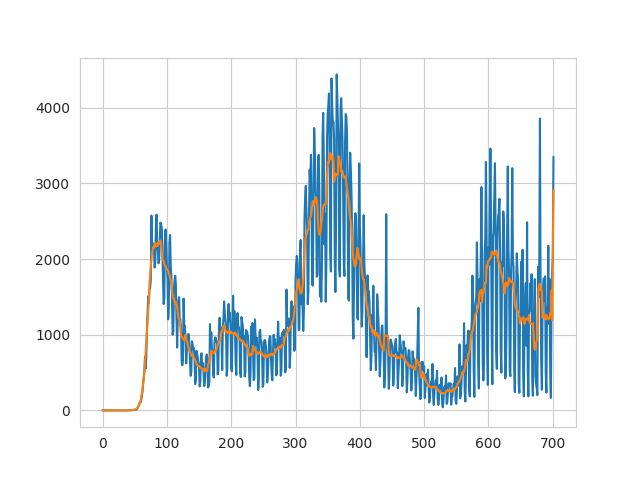

In [5]:
plt.figure()
plt.plot(diff_data['deaths_true'])
plt.plot(diff_data['deaths_smooth'])
plt.show()

<IPython.core.display.Javascript object>


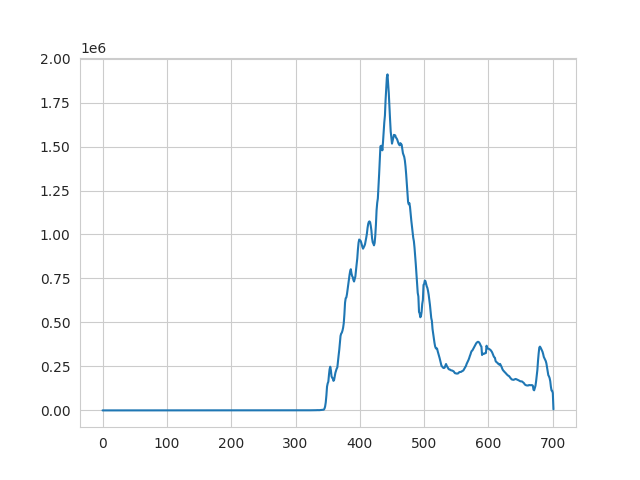

In [6]:
plt.figure()
plt.plot(diff_data['vaccine_smooth'])
plt.show()

In [54]:
pred_data = pd.read_csv("../C++/build/release/results/usa_prediction_seed1.txt", \
                        skipinitialspace=True)
#print("pred_data:\n", pred_data)
num_days = len(pred_data)
print("Num days:", num_days)

param_data = pd.read_csv("../C++/build/release/results/usa_params_seed1.txt", \
                        skipinitialspace=True,header=None)
# param_data = param_data.iloc[:, ::-1];
#print(param_data)

beta = param_data.loc[0:num_days-1]
c    = param_data.loc[  num_days:2*num_days-1]
IFR  = param_data.loc[2*num_days:3*num_days-1]

num_sol_to_plot = min(5, len(param_data.columns));

T_incub = param_data.loc[param_data.index[-6]]
T_recov = param_data.loc[param_data.index[-5]]
beta_vac_scaling = param_data.loc[param_data.index[-4]]
vaccine_alpha = param_data.loc[param_data.index[-3]]
IFR_scaling = param_data.loc[param_data.index[-2]]
#print("Vaccine effectiveness:\n",vaccine_eff)

print("T_incub:\n", T_incub)
print("T_recov:\n", T_recov)
print("beta_vac_scaling:\n", beta_vac_scaling)
print("vaccine_alpha:\n", vaccine_alpha)
print("IFR_scaling:\n", IFR_scaling)

optimal_params = {
    "beta": beta[0].tolist(),
    "c"   : c[0].tolist(),
    "IFR"  : IFR[0].tolist(),
    "beta_vac_scaling": beta_vac_scaling[0],
    "vaccine_alpha": vaccine_alpha[0],
    "IFR_scaling": IFR_scaling[0]
}

#Write optimal parameters as JS variable
opt_param_json_file = open("optimal_parameters.js", "w")
opt_param_json_file.write("let optimal_model_params = ")
json.dump(optimal_params, opt_param_json_file)
opt_param_json_file.close()

error = param_data.loc[param_data.index[-1]]
error_plot = error[0:num_sol_to_plot]
print("Error:\n",error)

scaled_error = (np.log(error_plot) - np.log(min(error_plot))) / (np.log(max(error_plot)) - np.log(min(error_plot))) * 0.9
print("Scaled error:\n", scaled_error)
grey_colors = np.tile(scaled_error,[3,1]).transpose();

# grey_colormap = matplotlib.colors.ListedColormap(grey_colors)
grey_colors[0] = [0.24, 0.63, 0.93] #Change color of best result to blue
print("Grey colors:\n", grey_colors)
# plt.figure()
# ax = sns.heatmap(np.random.rand(30,30))
# ax.pcolor(np.random.rand(30,30),cmap=grey_colormap)
# plt.show()

start_date = datetime.strptime("2020-01-22", "%Y-%m-%d")
dates = [];
for i in range(0,num_days):
    dates.append(start_date + timedelta(days=i))

locator = mdates.AutoDateLocator(minticks=4, maxticks=10)
formatter = mdates.ConciseDateFormatter(locator)

Num days: 702
T_incub:
 0    4.955203
1    5.328449
2    7.612340
3    6.227221
4    3.190710
Name: 2106, dtype: float64
T_recov:
 0     5.179355
1     6.351785
2     6.575412
3    12.320030
4    13.960040
Name: 2107, dtype: float64
beta_vac_scaling:
 0    0.530727
1    0.799222
2    0.428153
3    0.829146
4    0.236089
Name: 2108, dtype: float64
vaccine_alpha:
 0    1.000000
1    1.000000
2    0.567547
3    0.829602
4    0.396581
Name: 2109, dtype: float64
IFR_scaling:
 0    0.245159
1    0.242279
2    0.000000
3    0.273050
4    0.387911
Name: 2110, dtype: float64
Error:
 0    0.003828
1    0.003879
2    0.003945
3    1.999750
4    1.999962
Name: 2111, dtype: float64
Scaled error:
 0    0.000000
1    0.001908
2    0.004346
3    0.899985
4    0.900000
Name: 2111, dtype: float64
Grey colors:
 [[0.24       0.63       0.93      ]
 [0.00190783 0.00190783 0.00190783]
 [0.00434613 0.00434613 0.00434613]
 [0.89998476 0.89998476 0.89998476]
 [0.9        0.9        0.9       ]]


<IPython.core.display.Javascript object>


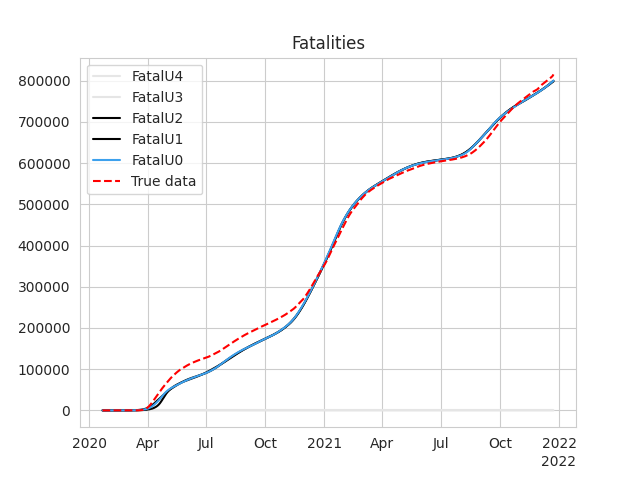

In [56]:
pred_fatal = pred_data.filter(regex=("FatalU.*"))

fig = plt.figure()

for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates,pred_fatal["FatalU"+str(i)], color=grey_colors[i])
    
plt.plot(dates,smoothed_data["deaths_smooth"],'r--')
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
    
labels = pred_fatal.columns[0:num_sol_to_plot][::-1].tolist();
labels.append("True data");
plt.legend(labels,loc='upper left')
plt.title('Fatalities')
plt.show()


<IPython.core.display.Javascript object>


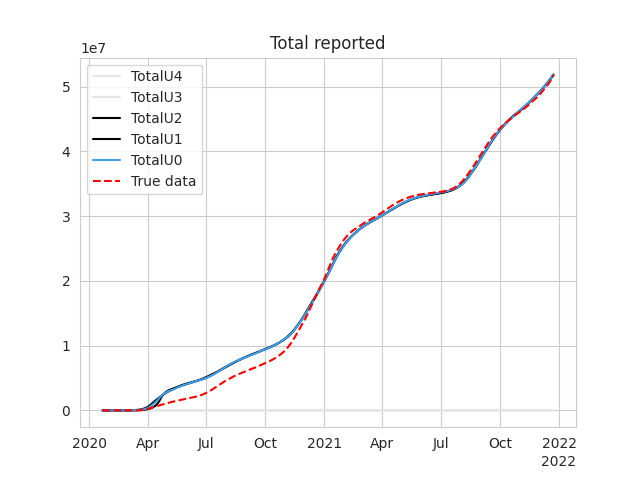

In [57]:
pred_reported = pred_data.filter(regex=("TotalU.*"))
# print(pred_reported)

plt.figure()

for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates, pred_reported["TotalU"+str(i)], color=grey_colors[i])

# plt.plot(pred_reported)
plt.plot(dates, smoothed_data["confirmed_smooth"],'r--')
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

labels = pred_reported.columns[0:num_sol_to_plot][::-1].tolist();
labels.append("True data");
plt.legend(labels,loc='upper left')
plt.title('Total reported')
plt.show()

       TotalVac0    TotalVac1    TotalVac2    TotalVac3    TotalVac4
0            0.0          0.0          0.0          0.0          0.0
1            0.0          0.0          0.0          0.0          0.0
2            0.0          0.0          0.0          0.0          0.0
3            0.0          0.0          0.0          0.0          0.0
4            0.0          0.0          0.0          0.0          0.0
..           ...          ...          ...          ...          ...
697  202697578.0  202697578.0  202697578.0  202697578.0  202697578.0
698  202832447.0  202832447.0  202832447.0  202832447.0  202832447.0
699  202945694.0  202945694.0  202945694.0  202945694.0  202945694.0
700  203057148.0  203057148.0  203057148.0  203057148.0  203057148.0
701  203155786.0  203155786.0  203155786.0  203155786.0  203155786.0

[702 rows x 5 columns]


<IPython.core.display.Javascript object>


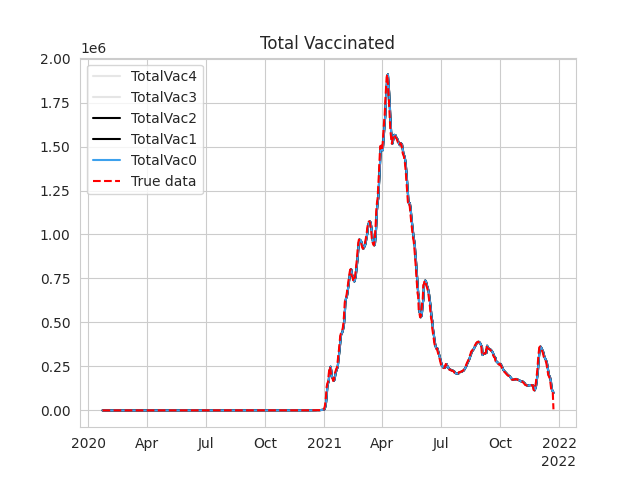

In [58]:
pred_vaccine = pred_data.filter(regex=("TotalVac.*"))
print(pred_vaccine)

plt.figure()

for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates, pred_vaccine["TotalVac"+str(i)].diff(), color=grey_colors[i])

# plt.plot(pred_reported)
plt.plot(dates, smoothed_data["vaccine_smooth"].diff(),'r--')
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

labels = pred_vaccine.columns[0:num_sol_to_plot][::-1].tolist();
labels.append("True data");
plt.legend(labels,loc='upper left')
plt.title('Total Vaccinated')
plt.show()

<IPython.core.display.Javascript object>


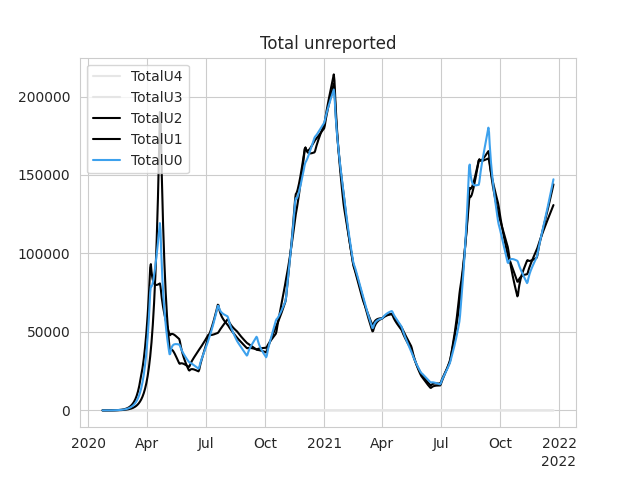

In [59]:
pred_unreported = pred_data.filter(regex=("TotalU.*"))
# print(pred_unreported)

plt.figure()

for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates, pred_unreported["TotalU"+str(i)].diff(), color=grey_colors[i])

ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

labels = pred_unreported.columns[0:num_sol_to_plot][::-1].tolist();
plt.legend(labels,loc='upper left')
plt.title('Total unreported')
plt.show()

        Reff0     Reff1     Reff2     Reff3     Reff4
0    2.589397  2.975325  3.280103  2.124191  1.171635
1    2.589397  2.975325  3.280103  2.124191  1.171635
2    2.589397  2.975325  3.280103  2.124191  1.171635
3    2.589397  2.975325  3.280103  2.124191  1.171635
4    2.589397  2.975325  3.280103  2.124191  1.171635
..        ...       ...       ...       ...       ...
697  1.613047  1.323949  1.545220  4.358305  4.320280
698  1.612179  1.323251  1.544050  4.357970  4.318611
699  1.611299  1.322543  1.542933  4.357688  4.317209
700  1.610408  1.321827  1.541814  4.357410  4.315830
701  1.609504  1.321101  1.540724  4.357165  4.314609

[702 rows x 5 columns]


<IPython.core.display.Javascript object>


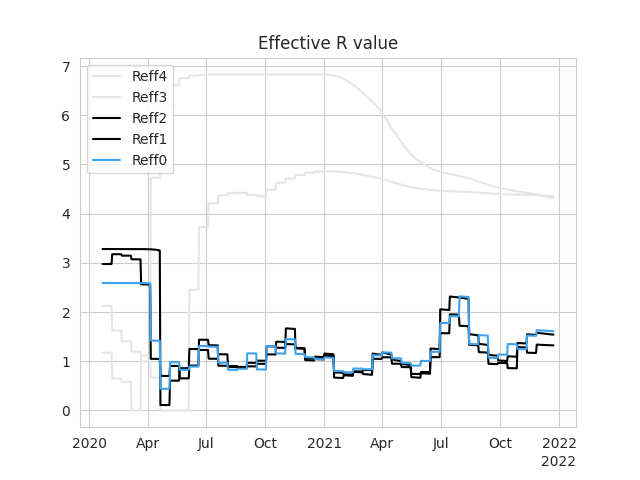

In [60]:
pred_Reff = pred_data.filter(regex=("Reff.*"))
print(pred_Reff)

plt.figure()

for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates, pred_Reff["Reff"+str(i)], color=grey_colors[i])

ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

labels = pred_Reff.columns[0:num_sol_to_plot][::-1].tolist();
plt.legend(labels,loc='upper left')
plt.title('Effective R value')
plt.show()

<IPython.core.display.Javascript object>


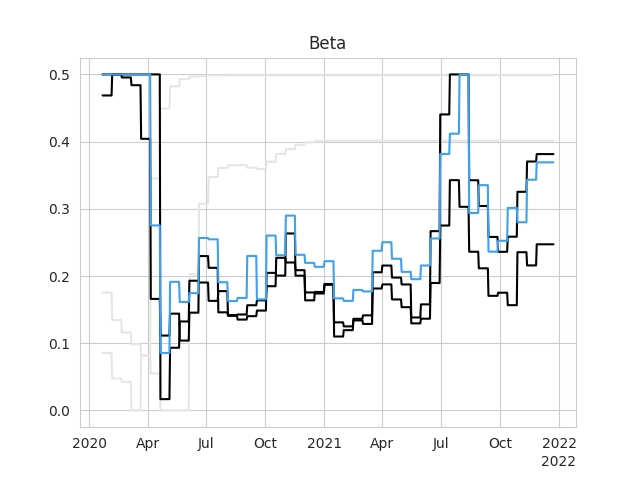

<IPython.core.display.Javascript object>


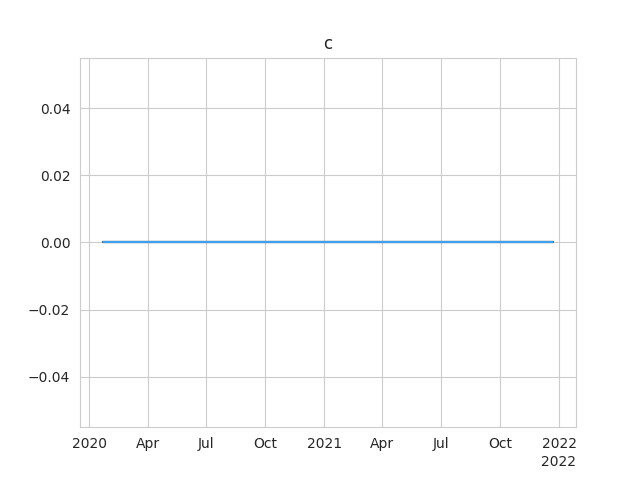

In [61]:
plt.figure()
for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates, beta[i], color=grey_colors[i])
# sns.lineplot(data=beta,palette=grey_colormap, dashes=False)
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
plt.title('Beta')
plt.show()

plt.figure()
for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates, c[i], color=grey_colors[i])
# sns.lineplot(data=c0,palette="Greys_r", dashes=False)
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
plt.title('c')
plt.show()

# print(sns.color_palette("light:#5A9")[0])

<IPython.core.display.Javascript object>


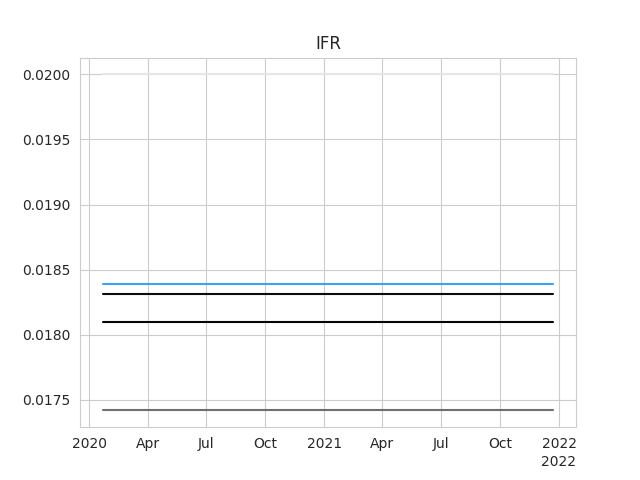

In [53]:
plt.figure()
for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates, IFR[i], color=grey_colors[i])
# sns.lineplot(data=IFR,palette="ch:s=.25,rot=-.25,reverse=1", dashes=False)
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
plt.title('IFR')
plt.show()

In [13]:

err_t = (pred_data['TotalR0'] - smoothed_data["confirmed_smooth"])
err_f = (pred_data['FatalR0'] - smoothed_data["deaths_smooth"])
cost_t = np.linalg.norm(err_t)**2 / np.linalg.norm(smoothed_data["confirmed_smooth"])**2;
cost_f = np.linalg.norm(err_f)**2 / np.linalg.norm(smoothed_data["deaths_smooth"])**2
print(cost_t, cost_f, cost_t+cost_f)
#print(smoothed_data["confirmed_smooth"])

0.020291039815172465 0.022915442054805887 0.04320648186997835


In [ ]:
print(err_t)
print(format(np.linalg.norm(smoothed_data["confirmed_smooth"])**2, '1.8e'))
print(format(np.linalg.norm(smoothed_data["deaths_smooth"])**2, '1.8e'))